In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data= pd.read_csv('dialect_dataset.csv')
print(len(Data))

458197


In [3]:
Data.head()

,id,dialect
0,1175358310087892992,IQ
1,1175416117793349632,IQ
2,1175450108898565888,IQ
3,1175471073770573824,IQ
4,1175496913145217024,IQ


In [4]:
#Exploring how many samples provided for each dialect
Data_distribution=pd.DataFrame(Data.groupby('dialect').id.nunique())
Data_distribution

,id
dialect,
AE,26296
BH,26292
DZ,16183
EG,57636
IQ,15497
JO,27921
KW,42109
LB,27617
LY,36499


<AxesSubplot:title={'center':'Dialect samples distribution'}, xlabel='dialect'>

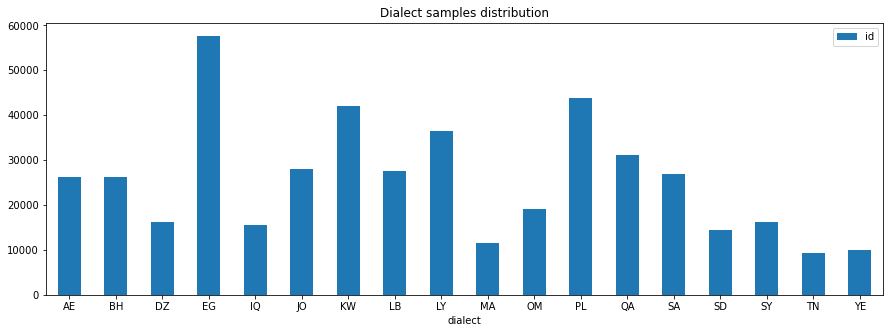

In [5]:
Data_distribution.plot.bar(rot=0,figsize=(15,5),title="Dialect samples distribution")

In [6]:
labels=np.unique(Data.dialect)
New_dataset=pd.DataFrame()
for i in labels:
  imm=Data.loc[Data['dialect'] == i , ['dialect', 'id']].head(9200) # I selected 9200 sample for each dialect
  New_dataset=New_dataset.append(imm)
New_dataset.reset_index().drop("index",axis=1)

,dialect,id
0,AE,1042813539512197248
1,AE,1043194042832613376
2,AE,1043227308470009984
3,AE,1045763660201758848
4,AE,1045774056476340224
...,...,...
165595,YE,1093289357631475584
165596,YE,1093831279936790400
165597,YE,1095267466048098432
165598,YE,1096095671147511808


<AxesSubplot:title={'center':'Dialect samples distribution'}, xlabel='dialect'>

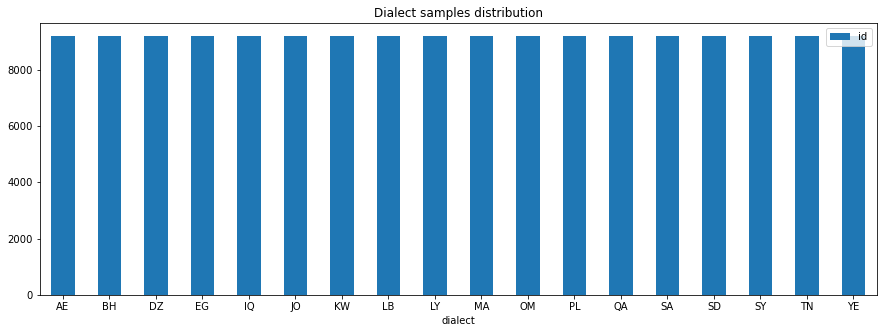

In [7]:

Data_distribution=pd.DataFrame(New_dataset.groupby('dialect').id.nunique())
Data_distribution
Data_distribution.plot.bar(rot=0,figsize=(15,5),title="Dialect samples distribution")

# Consuming dataset from the provided URL


In [8]:
import requests
import json

In [9]:
# Creating lists of ONLY 1000 IDs so as to create the JSON object and post it to the URL

def divide_chunks(l, n):
      
    # looping till length l
    for i in range(0, len(l), n): 
        yield l[i:i + n]

IDs=list(New_dataset.id)

IDs_str=list(map(str, IDs))

Lists_of_IDs=list(divide_chunks(IDs_str,1000))

In [10]:
#checking that all of the created lists contains no more than 1000 ID
len(Lists_of_IDs[125])

1000

In [11]:
from requests.models import Response
# Posting the lists of the IDs to the URL and saving the results

url = 'https://recruitment.aimtechnologies.co/ai-tasks'

results=[]

for k in Lists_of_IDs:
  data=json.dumps(k)
  responses = requests.post(url,data=data)
  tweets_dic=(responses.json())
  values=list(tweets_dic.values())
  results.extend(values)
  
  

In [12]:
New_dataset["Content"]= results

In [13]:
New_dataset

,dialect,id,Content
405609,AE,1042813539512197248,@Bushanain ياخي المدرب أختاره والمدرب دخله وال...
405610,AE,1043194042832613376,شو اللي قاعد يجري فالنصر يا أخوه ..\nخسر المبا...
405611,AE,1043227308470009984,اللي يبحث عن مشكلة الوصل \n\nراح يحصلها فالجول...
405612,AE,1045763660201758848,@Khamis0001 انا مش معترض على تغيير عامر .... ا...
405613,AE,1045774056476340224,تراجع مخيف في مستوى الحارس الكبير ماجد ناصر .....
...,...,...,...
227782,YE,1093289357631475584,@malarab1 الف سلامه عليك وعل رفاقك
227783,YE,1093831279936790400,@kooora هذا مكتوب عليه اسم ميسي \n\nيعني نزااا...
227784,YE,1095267466048098432,@waleedmutawakil هات ما عندك بدل كلام الإنشاء
227785,YE,1096095671147511808,جواس جواس جواس جواس جواس جواس جواس جواس جواس ج...


In [15]:
New_dataset.to_excel("Data.xlsx")